# Midterm

Name: Young, James Yang

SID: 20740589

### Question 1

(A)

The problem $f(x) = \frac{1}{2}\mathbf{x}^\top\boldsymbol{\Sigma}\mathbf{x} -\mathbf{c}^\top\text{log}(\mathbf{x})$ subject to $x \ge 0$ is convex as taking gradiant and hessian of $f(x)$ gives us: 

$\nabla f(x) = \Sigma x - c\frac{1}{xln(x)}$

$\nabla^2 f(x) = \Sigma + c\frac{1}{x\ln \left(10\right)}$, where $c\frac{1}{x\ln \left(10\right)}\succeq 0$ for $x > 0$ since is also $c \ge 0$.

This means that the problem is convex as $\nabla^2 f(x) \succeq 0$ (as long as $\Sigma + c\frac{1}{x\ln \left(10\right)} \succeq 0$)

(B)

In [31]:
# import packages
from scipy import optimize as opt
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
import seaborn as sns
import math

In [32]:
# read and extract from dataset
all_dataset = pd.read_csv('dataset.csv',index_col=0, parse_dates=True)
# get log returns from "2015-01-06" to "2015-05-29"
start_date = '2015-01-06'
end_date = '2015-05-29'
dataset = all_dataset.loc[start_date:end_date]
dataset # check

,TRIP,DVN,DTE,TGT,IDXX,IBM,IQV,VZ,OMC,UAL
date,,,,,,,,,,
2015-01-06,-0.038116,-0.020655,-0.001510,-0.000135,0.003207,-0.021802,-0.023209,0.010042,-0.006593,-0.024020
2015-01-07,0.011786,0.004685,0.011787,0.037154,0.019966,-0.006557,0.012191,-0.006474,0.003369,0.014603
2015-01-08,0.033591,0.034870,0.004585,0.004679,0.007253,0.021502,0.024452,0.021206,0.015618,0.016797
2015-01-09,0.017187,0.009814,-0.007461,-0.009117,-0.005585,0.004346,-0.006440,-0.008942,-0.008780,-0.019701
2015-01-12,-0.042204,-0.021416,-0.000807,0.002613,0.008498,-0.016923,0.004072,0.006820,-0.005896,0.008838
...,...,...,...,...,...,...,...,...,...,...
2015-05-22,0.012158,-0.000593,-0.000628,-0.001260,0.004986,-0.006482,0.014306,-0.005828,-0.008023,-0.008162
2015-05-26,-0.031640,-0.017644,-0.005669,-0.002652,-0.006582,-0.012210,-0.006188,-0.003838,-0.019151,-0.033523
2015-05-27,0.009343,-0.003627,0.000505,0.015310,-0.003416,0.010932,0.017884,0.003031,0.001588,0.033709


In [33]:
# c values
c1= np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])
c1= c1.reshape((-1,1))
c2= np.array([0.2,0.2,0.2,0.05,0.05,0.05,0.05,0.05,0.05,0.1])
c2= c2.reshape((-1,1))
c3= np.array([0.15,0.25,0.1,0.1,0.02,0.02,0.02,0.02,0.02,0.3])
c3= c3.reshape((-1,1))

# set up cvxpy 
t, n = dataset.shape # n is number of assets
sigma = np.cov(dataset.T) # covariance
x1 = cp.Variable(n) # x for c1
x2 = cp.Variable(n) # x for c2
x3 = cp.Variable(n) # x for c3
# set up RPP formulation, setup similar to cvxpy quadratic program example
problem1 = cp.Problem(cp.Minimize(0.5*cp.QuadForm(x1,sigma)-c1.T @ cp.log(x1)), [x1>=0])
problem2 = cp.Problem(cp.Minimize(0.5*cp.QuadForm(x2,sigma)-c2.T @ cp.log(x2)), [x2>=0])
problem3 = cp.Problem(cp.Minimize(0.5*cp.QuadForm(x3,sigma)-c3.T @ cp.log(x3)), [x3>=0])

# solve for x
problem1.solve()
problem2.solve()
problem3.solve()
x1_sol = np.array(x1.value)
x2_sol = np.array(x2.value)
x3_sol = np.array(x3.value)
x_sol = pd.DataFrame(np.vstack((x1_sol,x2_sol,x3_sol)),index=['x1','x2','x3'])
x_sol

,0,1,2,3,4,5,6,7,8,9
x1,6.647134,11.835173,14.367377,14.572328,9.051112,12.157457,13.522470,21.672108,15.492325,7.883334
x2,11.737859,18.758774,25.631879,8.474387,5.913634,6.518484,7.437404,12.682455,8.532986,8.507036
x3,9.592527,23.629960,15.321392,15.573089,2.872023,3.056588,3.202045,5.718488,4.031578,18.445079


In [34]:
# find W
w1 = x1_sol/np.sum(x1_sol)
w2 = x2_sol/np.sum(x2_sol)
w3 = x3_sol/np.sum(x3_sol)

w1 = w1.reshape(-1,1)
w2 = w2.reshape(-1,1)
w3 = w3.reshape(-1,1)

# w_all = pd.DataFrame(np.vstack((w1,w2,w3)),columns=dataset.columns, index=["w for c1","w for c2", "w for c3"])
w_all = pd.DataFrame(np.hstack((w1,w2,w3)),index=dataset.columns, columns=["c1","c2", "c3"])

In [35]:
print("W values for c1, c2, c3: \n\n",w_all)

W values for c1, c2, c3: 

             c1        c2        c3
TRIP  0.052257  0.102788  0.094561
DVN   0.093043  0.164270  0.232939
DTE   0.112950  0.224457  0.151035
TGT   0.114562  0.074210  0.153516
IDXX  0.071156  0.051785  0.028312
IBM   0.095577  0.057082  0.030131
IQV   0.106308  0.065129  0.031565
VZ    0.170377  0.111060  0.056372
OMC   0.121794  0.074723  0.039742
UAL   0.061975  0.074496  0.181827


In [36]:
# corresponding RRC values

# find volatility
volatility1 = w1.T @ sigma @ w1
volatility2 = w2.T @ sigma @ w2
volatility3 = w3.T @ sigma @ w3

# compute rrc_i
rrc1 = (w1 * (sigma @ w1)) / (volatility1 * w1)
rrc2 = (w2 * (sigma @ w2)) / (volatility2 * w2)
rrc3 = (w3 * (sigma @ w3)) / (volatility3 * w3)

rrc = pd.DataFrame(np.hstack((rrc1,rrc2,rrc3)),index=dataset.columns,columns=["c1","c2", "c3"])
rrc

,c1,c2,c3
TRIP,1.913618,1.945754,1.586277
DVN,1.074769,1.217509,1.073243
DTE,0.885344,0.891039,0.662099
TGT,0.872893,0.673765,0.651398
IDXX,1.405360,0.965522,0.706420
IBM,1.046278,0.875931,0.663765
IQV,0.940662,0.767706,0.633612
VZ,0.586935,0.450208,0.354789
OMC,0.821057,0.669138,0.503241
UAL,1.613540,1.342357,1.649916


(C)

Text(0, 0.5, 'Ratio')

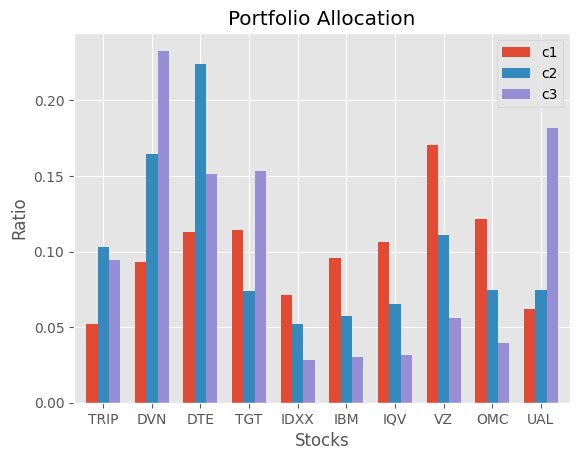

In [37]:
# Plot capital allocation distribution
ax1 = w_all.plot.bar(rot=0,title="Portfolio Allocation",width=0.7)
ax1.set_xlabel("Stocks")
ax1.set_ylabel("Ratio")

(D)

Text(0, 0.5, 'RRC')

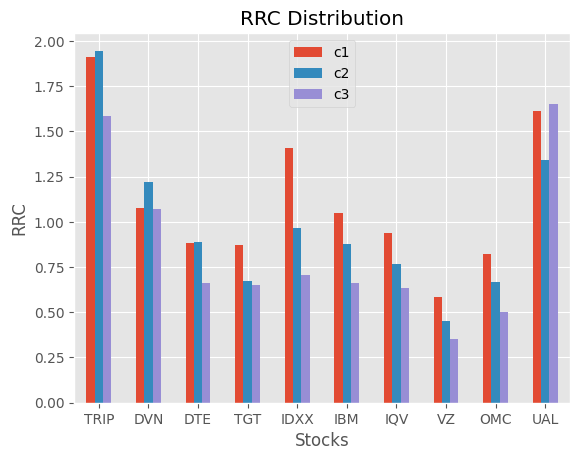

In [38]:
# Plot RRC distribution
rrc = pd.DataFrame(np.hstack((rrc1,rrc2,rrc3)),index=dataset.columns,columns=["c1","c2", "c3"])
ax2 = rrc.plot.bar(rot=0,title="RRC Distribution")
ax2.set_xlabel("Stocks")
ax2.set_ylabel("RRC")

### Question 2

In [39]:
# setup from file
import numpy as np
import math
import cvxpy as cp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch,random
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
dataset_log_returns = pd.read_csv('dataset.csv', index_col=0, parse_dates=True)

In [40]:
# from file

# A sub function for the satge 1 and 2, called in the hrp_s12()
def getQuasiDiag(link):
    link=link.astype(int)
    sortIx=pd.Series([link[-1,0],link[-1,1]])
    numItems=link[-1,3]
    while sortIx.max()>=numItems:
        sortIx.index=range(0,sortIx.shape[0]*2,2)
        df0=sortIx[sortIx>=numItems]
        i=df0.index;j=df0.values-numItems
        sortIx[i]=link[j,0]
        df0=pd.Series(link[j,1],index=i+1)
        sortIx=sortIx.append(df0)
        sortIx=sortIx.sort_index()
        sortIx.index=range(sortIx.shape[0])
    return sortIx.tolist()

# Transform the correlation matrix to a distance matrix
def correlDist(corr, n_stock):
    dist=((1-corr)/2.)**.5
    for i in range(n_stock):
        dist.iloc[i,i] = 0
    return dist

# Plot the heatmap of the correlation matrix
def plotCorrMatrix(path,corr,labels=None):
 #
    if labels is None:labels=[]
    plt.pcolor(corr)
    plt.colorbar()
    plt.yticks(np.arange(.5,corr.shape[0]+.5),labels)
    plt.xticks(np.arange(.5,corr.shape[0]+.5),labels)
    plt.savefig(path)
    plt.clf();plt.close()
    return

# Function for Stage 1 and 2
def hrp_s12(cov,stock_namelist, ifplot = False):
    n_stock = len(stock_namelist)
 #1) compute and plot correlation matrix
    v = np.diag(np.sqrt(1/np.diag(cov)))
    corr = np.dot(np.dot(v,cov), v)
    cov = pd.DataFrame(cov, columns = stock_namelist, index = stock_namelist)
    corr = pd.DataFrame(corr, columns = stock_namelist, index = stock_namelist)
    if (ifplot): plotCorrMatrix('HRP_corr0.png',corr,labels=corr.columns)
 #2) cluster
    dist=correlDist(corr,n_stock)
    link=sch.linkage(dist,'single')

    sortIx=getQuasiDiag(link)
    sortIx=corr.index[sortIx].tolist() # recover labels
    df0=corr.loc[sortIx,sortIx] # reorder
    if (ifplot): plotCorrMatrix('HRP_corr1.png',df0,labels=df0.columns)
    return sortIx

(A)

In [41]:
stock_namelist = dataset_log_returns.columns.values.tolist()
log_returns_1 = dataset_log_returns.loc['2015-01-06':'2015-05-29']
Sigma = np.cov(log_returns_1.T)
sortIx = hrp_s12(Sigma, stock_namelist, ifplot= True)

Before stage 1&2:


<img src=" 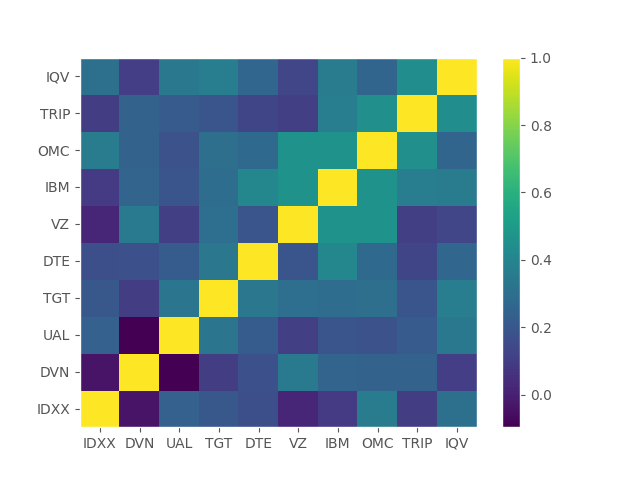" />


After stage 1&2:


<img src=" 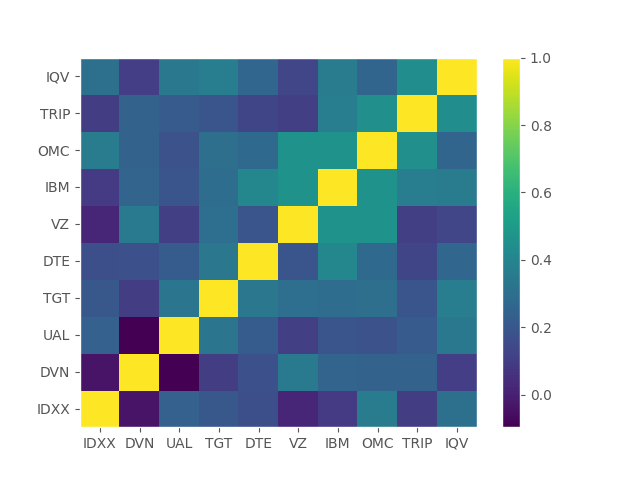">

(B)

In [42]:
# Helper functions for Question 2

# 2.1 helper: 
## someArray is bisected and returns tuple of bisected arrays
def bisect(someArray):
    bisect1 = someArray[:len(someArray)//2]
    bisect2 = someArray[len(someArray)//2:]
    return bisect1, bisect2

# 2.2, 2.3, 2.4 helper:
## arr1 is either L1, arr2 is L2, cov is Sigma, w_n is the weights to be updated based on calculations
def weightAllocationIndex(arr1, arr2, cov, w_n, name_list, log_ret):
    # just in case initialization
    Sigma = np.cov(log_ret.T)
    cov = pd.DataFrame(Sigma, columns = name_list, index = name_list)
    
    # get the log returns from the specified stocks in arr1 and arr2 
    log_ret_1 = log_ret.loc[:,arr1]
    log_ret_2 = log_ret.loc[:,arr2]

    # 2.2: Calculation for tilde Vi by finding Li, tilde wi, vi 
    # calculate v1, v2
    arr1_cov = cov.loc[arr1, arr1]
    arr2_cov = cov.loc[arr2, arr2]
    # calculate tilde w1 and w2 based on formula given
    w1 = np.diag(arr1_cov)**-1 / np.trace(np.diag(np.diag(arr1_cov)**-1))
    w2 = np.diag(arr2_cov)**-1 / np.trace(np.diag(np.diag(arr2_cov)**-1))
    # convert them to 2d array
    w1 = w1.reshape(-1,1)
    w2 = w2.reshape(-1,1)
    #calculate tilde v1, v2 from formula
    v1 = np.dot(np.dot(w1.T,arr1_cov),w1)
    v2 = np.dot(np.dot(w2.T,arr2_cov),w2)
    
    # 2.3: Compute split factor
    alpha = 1- (v1/(v1+v2))
    arr1_indices = [log_returns_1.columns.get_loc(i) for i in arr1]
    arr2_indices = [log_returns_1.columns.get_loc(i) for i in arr2]
    
    # 2.4: rescale allocations depending on if l1 or l2
    for i in arr1_indices:
        w_n[i] *= alpha
    for j in arr2_indices:
        w_n[j] *= (1-alpha)



In [43]:
# Part B:

# The function you need to write.
# Input: cov: a dataframe containing the covariance matrix of stocks.
#        sortIx: a list containing the stocks names, ordered by the stage 1&2.
#        You can add any input argument if you need.
# Output: allocation weight. You can output any data type as long as you can use it properly in Q3.
def getRecBipart(cov,sortIx):
    # weights
    w_n = np.ones(len(sortIx))

    # # list of stocks sorted by index number from sortIx strings
    # L = [log_returns_1.columns.get_loc(i) for i in sortIx]

    # bisect manually

    # bisect sortIx into L1 and L2
    l1, l2 = bisect(sortIx)
    weightAllocationIndex(l1,l2,Sigma, w_n,stock_namelist,log_returns_1)
    # Bisect L1 into subsets:

    # split into subsets l1_bis1 = {1,2} l1_bis2 = {3,4,5}
    l1_bis1, l1_bis2 = bisect(l1)
    weightAllocationIndex(l1_bis1,l1_bis2,Sigma, w_n,stock_namelist,log_returns_1)


    # l1_bis3 = {1} l1_bis4 = {2}
    l1_bis3, l1_bis4 = bisect(l1_bis1)
    weightAllocationIndex(l1_bis3,l1_bis4,Sigma, w_n,stock_namelist,log_returns_1)

    #l1_bis5 = {3} l1_bis6 = {4,5}
    l1_bis5, l1_bis6 = bisect(l1_bis2)
    weightAllocationIndex(l1_bis5,l1_bis6,Sigma, w_n,stock_namelist,log_returns_1)

    # l1_bis7 = {3} l1_bis8 = {4}
    l1_bis7, l1_bis8 = bisect(l1_bis6)
    weightAllocationIndex(l1_bis7,l1_bis8,Sigma, w_n,stock_namelist,log_returns_1)

    # Bisect L2 into subsets, same as above but for L2

    # split into subsets l2_bis1 = {1,2} l1_bis2 = {3,4,5}
    l2_bis1, l2_bis2 = bisect(l2)
    weightAllocationIndex(l2_bis1,l2_bis2,Sigma, w_n,stock_namelist,log_returns_1)


    # l1_bis3 = {1} l1_bis4 = {2}
    l2_bis3, l2_bis4 = bisect(l2_bis1)
    weightAllocationIndex(l2_bis3,l2_bis4,Sigma, w_n,stock_namelist,log_returns_1)

    #l1_bis5 = {3} l1_bis6 = {4,5}
    l2_bis5, l2_bis6 = bisect(l2_bis2)
    weightAllocationIndex(l2_bis5,l2_bis6,Sigma, w_n,stock_namelist,log_returns_1)

    # l1_bis7 = {3} l1_bis8 = {4}
    l2_bis7, l2_bis8 = bisect(l2_bis6)
    weightAllocationIndex(l2_bis7,l2_bis8,Sigma, w_n,stock_namelist,log_returns_1)
    
    # !use stock_namelist for index otherwise out of order
    w_n = pd.DataFrame(w_n, index = stock_namelist, columns =['Weights'])
    return w_n


def hrp_s3(cov,stock_namelist,sortIx):
    cov = pd.DataFrame(cov, columns = stock_namelist, index = stock_namelist)
    # Finish this function getRecBipart(cov,sortIx).
    hrp = getRecBipart(cov,sortIx)
    # Please print and check the "hrp" returned by the "getRecBipart(cov,sortIx)".
    # The order of stocks in "hrp" maybe follow the "sortIx", which is different from the "stock_namelist".
    # I suggest you to restore the order of "hrp" to "stock_namelist" here,
    # in order to avoid mistakes in Q3.
    # My "hrp" is a pandas.series, so this is what I do:
    # hrp = hrp[stock_namelist]
    # It's OK if you want to finish this step in "getRecBipart()".
    # It's also Ok if you want to skip this step here and deal with this small order problem in Q3.
    return hrp


(C)

In [44]:
w_hrp = hrp_s3(Sigma, stock_namelist, sortIx)
print(w_hrp)

       Weights
TRIP  0.016780
DVN   0.077009
DTE   0.109417
TGT   0.127480
IDXX  0.048225
IBM   0.100589
IQV   0.084897
VZ    0.219148
OMC   0.181932
UAL   0.034522


### Question 3

(A)

In [45]:
all_dataset

,TRIP,DVN,DTE,TGT,IDXX,IBM,IQV,VZ,OMC,UAL
date,,,,,,,,,,
2015-01-06,-0.038116,-0.020655,-0.001510,-0.000135,0.003207,-0.021802,-0.023209,0.010042,-0.006593,-0.024020
2015-01-07,0.011786,0.004685,0.011787,0.037154,0.019966,-0.006557,0.012191,-0.006474,0.003369,0.014603
2015-01-08,0.033591,0.034870,0.004585,0.004679,0.007253,0.021502,0.024452,0.021206,0.015618,0.016797
2015-01-09,0.017187,0.009814,-0.007461,-0.009117,-0.005585,0.004346,-0.006440,-0.008942,-0.008780,-0.019701
2015-01-12,-0.042204,-0.021416,-0.000807,0.002613,0.008498,-0.016923,0.004072,0.006820,-0.005896,0.008838
...,...,...,...,...,...,...,...,...,...,...
2018-12-18,0.004668,-0.044077,-0.004478,0.015275,0.020358,0.004726,-0.001731,-0.005377,-0.007767,0.018275
2018-12-19,-0.022853,-0.023209,0.001583,-0.038712,-0.019760,-0.001888,-0.014569,0.003767,-0.007015,-0.016421
2018-12-20,-0.029730,-0.057825,0.006394,-0.018149,0.006180,-0.029725,-0.032058,-0.014244,-0.014019,-0.022955


In [46]:
# get factors from file
factors = pd.read_csv('factors.csv', index_col=0, parse_dates=True)

factors.head()

,Mkt-RF,SMB,HML
Date,,,
2015-01-06,-0.0104,-0.0078,-0.0031
2015-01-07,0.0119,0.0020,-0.0066
2015-01-08,0.0181,-0.0011,-0.0028
2015-01-09,-0.0085,0.0001,-0.0047
2015-01-12,-0.0079,0.0040,-0.0044


In [47]:
# estimate alpha and beta using least squares similar to HW2
X = all_dataset.to_numpy().T
(N,T) = X.shape

F = np.vstack((np.ones((1,1000)),factors.to_numpy().T))

gamma = cp.Variable((N,4))
obj = cp.sum_squares(X-gamma@F)
problem = cp.Problem(cp.Minimize(obj))
result = problem.solve()

Gamma = pd.DataFrame(gamma.value, columns=["Alpha", "Beta1", "Beta2", "Beta3"],index=stock_namelist)
print(Gamma)

         Alpha     Beta1     Beta2     Beta3
TRIP -0.000662  1.153965  0.333557 -0.505423
DVN  -0.001180  1.654657  0.512218  1.585148
DTE   0.000251  0.332389 -0.475470 -0.139733
TGT  -0.000190  0.718524  0.243826  0.191927
IDXX  0.000542  1.010351 -0.022946 -0.843441
IBM  -0.000466  0.950325 -0.197328  0.129400
IQV   0.000308  0.919946  0.159220 -0.639448
VZ    0.000185  0.586535 -0.379375  0.259116
OMC  -0.000135  0.781819 -0.034139  0.154962
UAL  -0.000069  1.144979  0.488025  0.055417


In [48]:
# stocks with highest alphas
print("Five stocks with the highest:\n ")
top_5 = Gamma['Alpha'].nlargest(n=5)
print(top_5)

Five stocks with the highest:
 
IDXX    0.000542
IQV     0.000308
DTE     0.000251
VZ      0.000185
UAL    -0.000069
Name: Alpha, dtype: float64


(B)

In [49]:
# use the five stocks found
five_stocks = all_dataset.loc[:,top_5.index]

# budget vector c
budget_vector = np.array([0.2,0.2,0.2,0.2,0.2]).reshape(-1,1)

w_rpp = np.zeros((9,5))

# RPP:
for i in range(1,10):
    # get next 100 days, tn-1
    window1 = five_stocks.iloc[(i-1)*100:(i-1)*100+100]
    t, n = window1.shape
    sigma = np.cov(window1.T) # covariance
    xn = cp.Variable(n) # x for c1
    # set up RPP formulation, setup similar to cvxpy quadratic program example
    rpp_prob = cp.Problem(cp.Minimize(0.5*cp.QuadForm(xn,sigma)-budget_vector.T @ cp.log(xn)), [xn>=0])
    rpp_prob.solve()
    # solve wn based on t(n-1)
    w = xn.value / np.sum(xn.value)
    w_rpp[i-1] = w

w_rpp = pd.DataFrame(w_rpp,columns=top_5.index,index=np.arange(1,10))

<AxesSubplot: title={'center': 'Portfolio Allocation in Different Rolling Windows (RRP)'}>

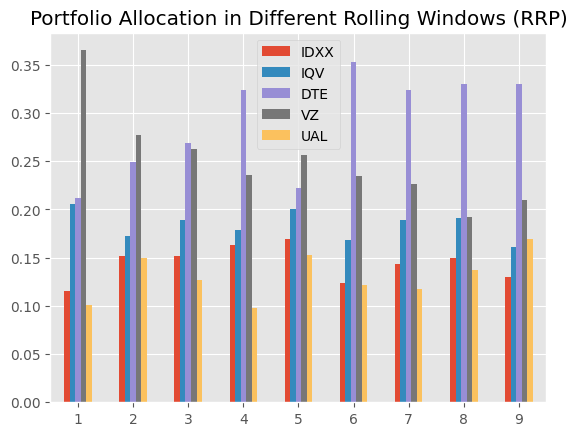

In [50]:
w_rpp.plot.bar(rot=0, title="Portfolio Allocation in Different Rolling Windows (RRP)")

In [51]:
# adjust HRP for Q3, change bisect part

def getRecBipart_1(cov,sortIx):
    # weights
    w_n = np.ones(len(sortIx))

    # # list of stocks sorted by index number from sortIx strings
    # L = [log_returns_1.columns.get_loc(i) for i in sortIx]

    # bisect manually

    # bisect sortIx into L1 and L2
    l1, l2 = bisect(sortIx)
    weightAllocationIndex(l1,l2,Sigma, w_n,stock_namelist,log_returns_1)
    # Bisect L1 into subsets:

    # split into subsets
    l1_bis1, l1_bis2 = bisect(l1)
    weightAllocationIndex(l1_bis1,l1_bis2,Sigma, w_n,stock_namelist,log_returns_1)

    # Bisect L2 into subsets, same as above but for L2

    l2_bis1, l2_bis2 = bisect(l2)
    weightAllocationIndex(l2_bis1,l2_bis2,Sigma, w_n,stock_namelist,log_returns_1)

    l2_bis3, l2_bis4 = bisect(l2_bis2)
    weightAllocationIndex(l2_bis3,l2_bis4,Sigma, w_n,stock_namelist,log_returns_1)

    
    # !use stock_namelist for index otherwise out of order
    w_n = pd.DataFrame(w_n, index = stock_namelist, columns =['Weights'])
    return w_n

def hrp_s3_1(cov,stock_namelist,sortIx):
    cov = pd.DataFrame(cov, columns = stock_namelist, index = stock_namelist)
    # Finish this function getRecBipart(cov,sortIx).
    hrp = getRecBipart_1(cov,sortIx)
    # Please print and check the "hrp" returned by the "getRecBipart(cov,sortIx)".
    # The order of stocks in "hrp" maybe follow the "sortIx", which is different from the "stock_namelist".
    # I suggest you to restore the order of "hrp" to "stock_namelist" here,
    # in order to avoid mistakes in Q3.
    # My "hrp" is a pandas.series, so this is what I do:
    # hrp = hrp[stock_namelist]
    # It's OK if you want to finish this step in "getRecBipart()".
    # It's also Ok if you want to skip this step here and deal with this small order problem in Q3.
    return hrp

In [52]:
# HRP
w_hrp = np.zeros((9,5))
for i in range(1,10):
    # initialize variables
    stock_namelist = top_5.index
    log_returns_1 = five_stocks.iloc[(i-1)*100:(i-1)*100+100]
    Sigma = np.cov(log_returns_1.T)
    # stage 1-3
    sortIx = hrp_s12(Sigma, stock_namelist, ifplot= False)
    w= hrp_s3_1(Sigma, stock_namelist, sortIx)
    # flatten and store in w_hrp
    w = w.to_numpy().flatten()
    w_hrp[i-1] = w
w_hrp = pd.DataFrame(w_hrp,columns=top_5.index,index=np.arange(1,10))

Text(0, 0.5, 'Ratio')

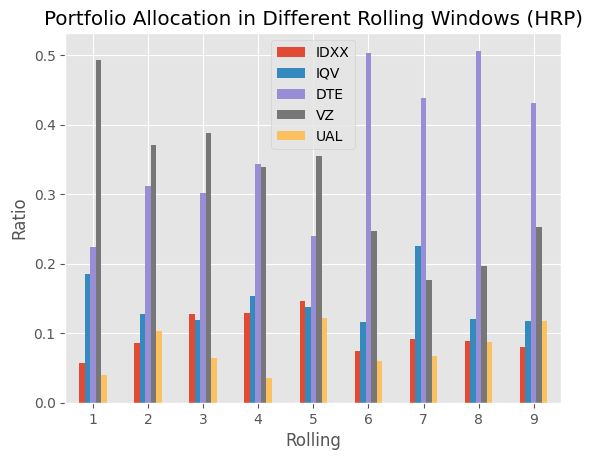

In [53]:
ax = w_hrp.plot.bar(rot=0,title="Portfolio Allocation in Different Rolling Windows (HRP)")
ax.set_xlabel("Rolling")
ax.set_ylabel("Ratio")

In [54]:
# GMVP (function taken from L9 pg 39)
# create function for GMVP
w_gmvp = np.zeros((9,5))
def GMVP(Sigma):
    w = cp.Variable(5)
    variance = cp.quad_form(w, Sigma)
    problem = cp.Problem(cp.Minimize(variance), [w >= 0, cp.sum(w) == 1])   
    problem.solve()
    return w.value
# solve w_gmvp for each wn
for i in range(1,10):
    # tn-1
    window1 = five_stocks.iloc[(i-1)*100:(i-1)*100+100]
    Sigma = np.cov(window1.T)
    w_gmvp[i-1] = GMVP(Sigma)

w_gmvp = pd.DataFrame(w_gmvp,columns=top_5.index,index=np.arange(1,10))

Text(0, 0.5, 'Ratio')

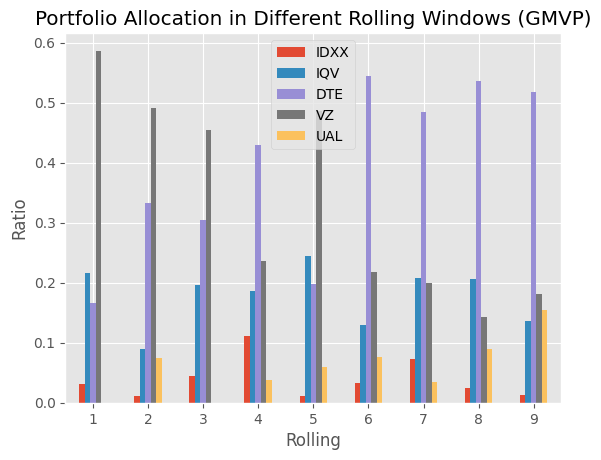

In [55]:
ax = w_gmvp.plot.bar(rot=0,title="Portfolio Allocation in Different Rolling Windows (GMVP)")
ax.set_xlabel("Rolling")
ax.set_ylabel("Ratio")

(C)

In [56]:
# in part B w_n is calculated from t_n-1, so use 900 days
sampled = five_stocks[0:900]
simple_returns = pd.DataFrame()
# calculate simple return Rt = rt * w^t
for i in range(9):
    simple_returns['RPP'] = sampled @ w_rpp.iloc[i]
    simple_returns['HRP'] = sampled @ w_hrp.iloc[i]
    simple_returns['GMVP'] = sampled @ w_gmvp.iloc[i]
# not compound
simple_returns = np.cumsum(simple_returns) + 1

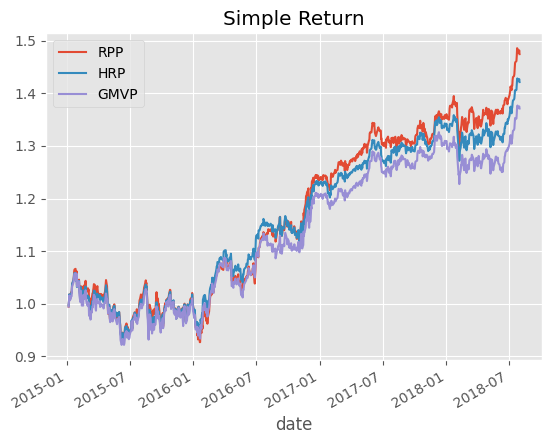

In [57]:
ax = simple_returns.plot(title="Simple Return")

(D)

In [58]:
# redo with shrinkage estimator, scaled identity target and p=0.3
p = 0.3
Sigma_scm = np.cov(five_stocks.T)
T, N = five_stocks.shape

T_I = np.sum(np.diag(Sigma_scm)) / N*np.eye(N)


sigma_sh =  (1-p)*Sigma_scm + np.diag(T_I) * p

print(sigma_sh)

[[3.01067268e-04 1.50437895e-04 9.74436531e-05 9.49910409e-05
  1.42907488e-04]
 [1.50437895e-04 2.13094572e-04 8.24484802e-05 9.02867457e-05
  1.41227248e-04]
 [9.74436531e-05 8.24484802e-05 1.51260485e-04 1.02214686e-04
  7.85093273e-05]
 [9.49910409e-05 9.02867457e-05 1.02214686e-04 1.56708501e-04
  9.63592427e-05]
 [1.42907488e-04 1.41227248e-04 7.85093273e-05 9.63592427e-05
  4.01479165e-04]]


In [59]:
# use shrinkage estimator to calculate simple returns for GMVP, RPP, HRP

# gmvp
w_gmvp_shr = GMVP(sigma_sh)
sortIx_shr = hrp_s12(sigma_sh,top_5.index, ifplot= False)

# hrp
w_hrp_shr = hrp_s3_1(sigma_sh, top_5.index, sortIx_shr)

w_hrp_shr

# rpp
x_shr = cp.Variable(N)
prob = cp.Problem(cp.Minimize(0.5*cp.QuadForm(x_shr,sigma_sh)-budget_vector.T @ cp.log(x_shr)), [x_shr>=0])
prob.solve()
w_rpp_shr = x_shr.value / np.sum(x_shr.value)


# calculate simple returns
simp_returns = pd.DataFrame()
simp_returns['RRP'] = five_stocks @ w_rpp_shr
simp_returns['HRP'] = five_stocks @ w_hrp_shr
simp_returns['GMVP'] = five_stocks @ w_gmvp_shr

simp_returns = np.cumsum(simp_returns) + 1

<AxesSubplot: xlabel='date'>

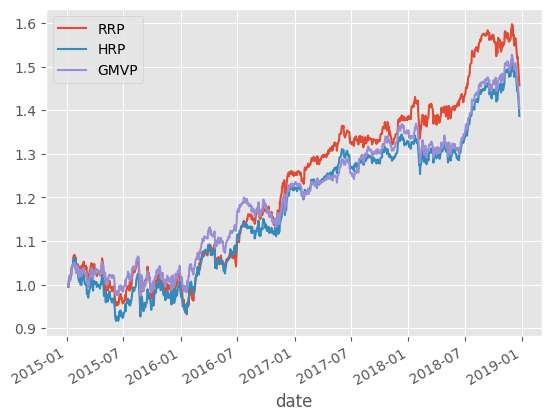

In [60]:
simp_returns.plot()